## **Ex.1 - Loading the dataset**

In [53]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<hr>

Splitting the data into 70% training and 30% test subsets.

In [54]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

Standardizing the data.

In [55]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### **Ex.2 - Principal component analysis in scikit-learn**

Part 1 - *Perform PCA and present the explained variance ratio* (check https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). Perform the transformation on test data and plot the first two principal components.

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

print(pca.explained_variance_ratio_)


[0.36951469 0.18434927]


os valores obtidos para a Explained Variance são uma medida estatística de quanta variação do dataset é atribuida a cada um dos eigenvectors selecionados com o PCA.

Part 2 - *Training logistic regression classifier using the first 2 principal components*. Using a cross-validation procedure (check https://scikit-learn.org/stable/modules/cross_validation.html), select the best C parameter for the logistic regression with the first two principal components. Repeat the same procedure for the dataset with all the original features. Compare the results in terms of accuracy and confusion matrix. Present the conclusions.

Best parameters:  {'C': 10}
Best score:  0.976
              precision    recall  f1-score   support

           1       0.94      0.83      0.88        18
           2       0.87      0.95      0.91        21
           3       1.00      1.00      1.00        15

    accuracy                           0.93        54
   macro avg       0.94      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54



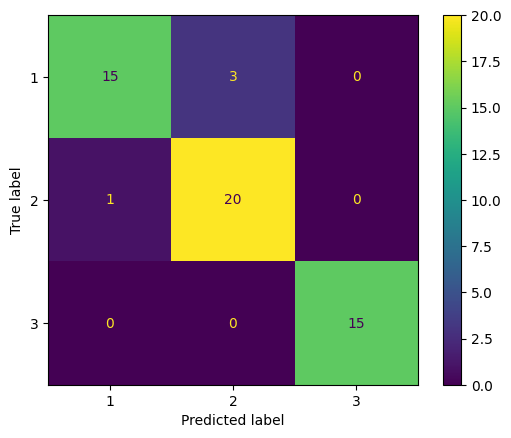


---------------- Results with original features ---------------
Best parameters:  {'C': 60}
Best score:  0.9596666666666666
              precision    recall  f1-score   support

           1       0.94      0.94      0.94        18
           2       0.95      0.95      0.95        21
           3       1.00      1.00      1.00        15

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.96      0.96      0.96        54



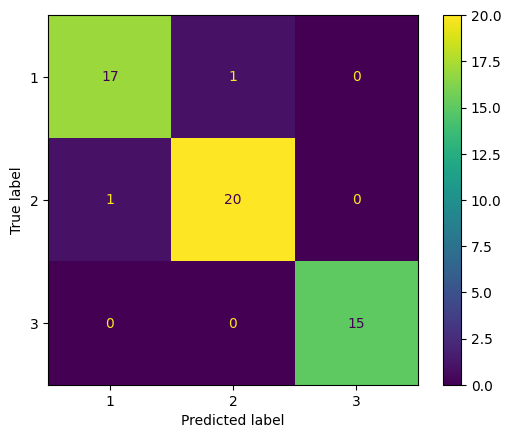

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

parameters = {'C':range(0, 100, 10)}
lr = LogisticRegression(random_state=1)
clf = GridSearchCV(lr, parameters, cv=5)
clf.fit(X_train_pca, y_train)

print('Best parameters: ', clf.best_params_)
print('Best score: ', clf.best_score_)

print(classification_report(y_test, clf.predict(X_test_pca)))

cm = confusion_matrix(y_test, clf.predict(X_test_pca))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

print('\n---------------- Results with original features ---------------')

parameters = {'C':range(0, 100, 10)}
lr = LogisticRegression(random_state=1)
clf = GridSearchCV(lr, parameters, cv=5)
clf.fit(X_train, y_train)

print('Best parameters: ', clf.best_params_)
print('Best score: ', clf.best_score_)

print(classification_report(y_test, clf.predict(X_test)))

cm = confusion_matrix(y_test, clf.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()
